In [19]:
# imports
from os import name
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt # for graphs

In [20]:
# get date
from datetime import datetime

now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d%m%Y%H%M%S")

In [21]:
# pytrends set
pytrends = TrendReq(hl='en-US') # language

In [22]:
# init vars
name = 'tsla'
keyWords=[]
keyWords.append(name)
timeframe = 'today '+'12-m' # fromat like 12-m, 5-y
geo = 'GB'
interest = None

In [23]:
# get google trends data
pytrends.build_payload(keyWords, timeframe=timeframe,  geo=geo)

interest = pytrends.interest_over_time()
interest = interest.drop('isPartial', axis=1)

lastTimestamp = interest.index[-1]
lastValue     = interest[name][-1]


In [24]:

value = interest[name]
sum=0
count=0
for i in value:
    count+=1
    sum+=i

print (sum)
print (count)
memuza = sum/count
print(memuza)

2249
52
43.25


In [25]:
from datetime import date
from datetime import datetime

now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d%m%Y%H%M%S")

today = date.today()
strToday = str(today.strftime('%Y-%m-%d'))
yearAgo = date(today.year - 1, today.month, today.day)
strYearAgo = str(yearAgo.strftime('%Y-%m-%d'))
start_date = strYearAgo
end_date = strToday

#alphavntage
from alpha_vantage.timeseries import TimeSeries

API_key = 'LMP6ND8IA11NAI2D'
ts = TimeSeries(key=API_key,output_format='pandas') # create time series object. pandas is output fromat

df, meta = ts.get_monthly_adjusted(name) # data - tpe dataframe
df = df.rename(columns={'4. close': 'Close'})
df = df[(df.index > start_date) & (df.index <= end_date)]
df = df.sort_index(ascending=True)


58


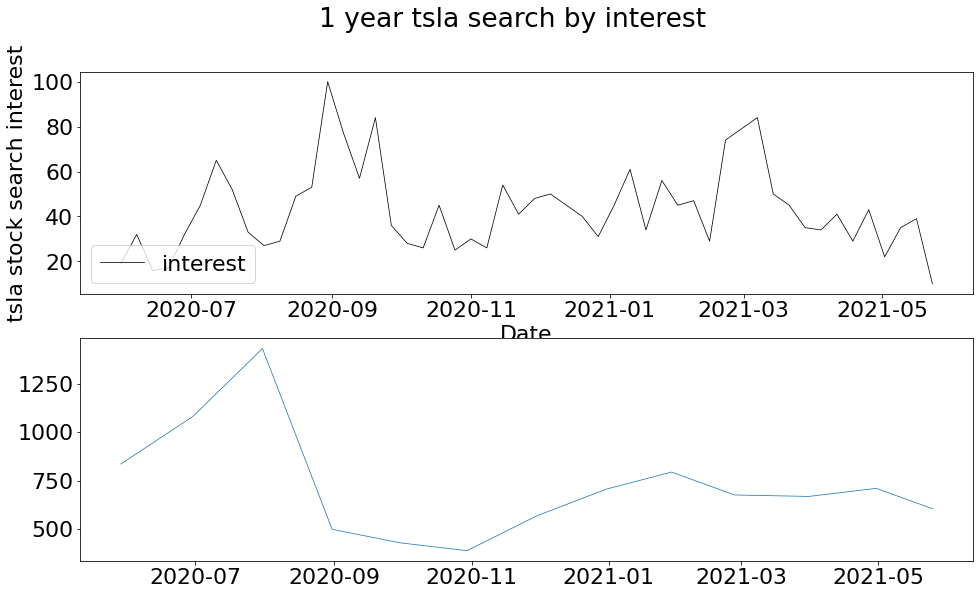

In [29]:
# saveGraphfig
print (58)
plt.rcParams["figure.figsize"] = [16,9] # size of graph
plt.rcParams["lines.linewidth"] = 0.75
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot( interest[name],label = 'interest', color = 'black')
ax1.legend(loc='lower left') # legend is an area describing the elements of the graph.
title = '1 year '+ name +' search by interest'
fig.suptitle(title)
ax1.set_xlabel(xlabel='Date')
ax1.set_ylabel(ylabel = name+' stock search interest')
ax2.plot(df['Close'],label = 'close price history',alpha=1) # show 

plt.rcParams.update({'font.size': 22})

trends_fig_place = r'stocks/trendFigs/' 
trends_fig_place = trends_fig_place +dt_string+ name+'.PNG'
        
plt.show()